<a href="https://colab.research.google.com/github/saoneenandi/EXPOSE-Class-XII-Capstone-Project/blob/main/EXPOSE_AI_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPOSE** #
*Unmasking the truth with AI-powered precision*

▶ [View Statistics](https://cdn.statcdn.com/Infographic/images/normal/6795.jpeg)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

from tensorflow.keras.layers import Input, LSTM, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

from google.colab import files
from wordcloud import WordCloud
from collections import Counter
from kaggle.api.kaggle_api_extended import KaggleApi

# **FEATURE 01: PREDICTION OF FAKE NEWS/RUMOURS**

**STEP 1: CREATING SAMPLE DATASET (WITH TEXTUAL, VISUAL AND CONTEXTUAL FEATURES)**


In [ ]:
# Create a synthetic dataset
np.random.seed(42)
num_samples = 1000
num_features = 50
numerical_data = np.random.rand(num_samples, num_features)

# Number of samples
num_samples = 1000

# Textual features
text_features = np.random.rand(num_samples, 50)

# Visual features
visual_features = np.random.rand(num_samples, 10)

# Contextual features
contextual_features = np.random.rand(num_samples, 5)

# Binary labels (0 or 1 for fake or not)
labels = np.random.randint(2, size=num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'text_feature_{}'.format(i): text_features[:, i] for i in range(text_features.shape[1])
})

# Add visual features to the DataFrame
data = pd.concat([data, pd.DataFrame({
    'visual_feature_{}'.format(i): visual_features[:, i] for i in range(visual_features.shape[1])
})], axis=1)

# Add contextual features to the DataFrame
data = pd.concat([data, pd.DataFrame({
    'contextual_feature_{}'.format(i): contextual_features[:, i] for i in range(contextual_features.shape[1])
})], axis=1)

# Add labels to the DataFrame
data['label'] = labels

# Save the dataset to a CSV file
data.to_csv('fake_news_dataset.csv', index=False)

# Display the DataFrame
print(data.head())

   text_feature_0  text_feature_1  text_feature_2  text_feature_3  \
0        0.847237        0.494517        0.195466        0.736642   
1        0.387106        0.691118        0.258044        0.832023   
2        0.400627        0.170629        0.935675        0.045426   
3        0.022231        0.274137        0.512422        0.354240   
4        0.001483        0.288148        0.090131        0.219413   

   text_feature_4  text_feature_5  text_feature_6  text_feature_7  \
0        0.418678        0.594627        0.107265        0.631584   
1        0.609814        0.775187        0.477155        0.229109   
2        0.470106        0.770227        0.316750        0.528835   
3        0.024055        0.223152        0.096419        0.948632   
4        0.333190        0.128057        0.706365        0.255920   

   text_feature_8  text_feature_9  ...  visual_feature_6  visual_feature_7  \
0        0.373550        0.334190  ...          0.835030          0.786894   
1        0.429

**STEP 2: WORKING ON THE MODEL BY TRAIN-TEST SPLIT METHOD**

In [ ]:
# Sample data
text_data = np.random.random((1000, 50))  # Sample text data
visual_data = np.random.random((1000, 10))  # Sample visual data
contextual_data = np.random.random((1000, 5))  # Sample contextual data
labels = np.random.randint(2, size=(1000,))  # Binary labels (fake or not)

# Split the data into training and testing sets
text_train, text_test, visual_train, visual_test, contextual_train, contextual_test, labels_train, labels_test = train_test_split(
    text_data, visual_data, contextual_data, labels, test_size=0.2, random_state=42
)

# Normalize the data
scaler_text = StandardScaler()
scaler_visual = StandardScaler()
scaler_contextual = StandardScaler()

text_train = scaler_text.fit_transform(text_train)
text_test = scaler_text.transform(text_test)

visual_train = scaler_visual.fit_transform(visual_train)
visual_test = scaler_visual.transform(visual_test)

contextual_train = scaler_contextual.fit_transform(contextual_train)
contextual_test = scaler_contextual.transform(contextual_test)

# Define input layers
text_input = Input(shape=(text_train.shape[1],), name='text_input')
visual_input = Input(shape=(visual_train.shape[1],), name='visual_input')
contextual_input = Input(shape=(contextual_train.shape[1],), name='contextual_input')

# Textual analysis
textual_output = Dense(64, activation='relu')(text_input)

# Visual analysis
visual_output = Dense(64, activation='relu')(visual_input)

# Contextual analysis
contextual_output = Dense(64, activation='relu')(contextual_input)

# Cross-Modal Fusion
concatenated = concatenate([textual_output, visual_output, contextual_output])

# Fully connected layers for decision-making
final_output = Dense(1, activation='sigmoid')(concatenated)

# Create the model
model = Model(inputs=[text_input, visual_input, contextual_input], outputs=final_output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    [text_train, visual_train, contextual_train],
    labels_train,
    epochs=10,
    batch_size=32,
    validation_data=([text_test, visual_test, contextual_test], labels_test)
)

# Evaluate the model
predictions = model.predict([text_test, visual_test, contextual_test])
predicted_labels = (predictions > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(labels_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(labels_test, predicted_labels)
recall = recall_score(labels_test, predicted_labels)
f1 = f1_score(labels_test, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Save the model for future use
model.save('fake_news_detection_model.h5')

Epoch 1/10
25/25 [==============================] - 1s 13ms/step - loss: 0.7297 - accuracy: 0.5150 - val_loss: 0.7106 - val_accuracy: 0.5200
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5550 - val_loss: 0.7120 - val_accuracy: 0.5200
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.5888 - val_loss: 0.7139 - val_accuracy: 0.5350
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.6237 - val_loss: 0.7171 - val_accuracy: 0.5250
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6342 - accuracy: 0.6375 - val_loss: 0.7224 - val_accuracy: 0.5200
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6650 - val_loss: 0.7272 - val_accuracy: 0.5100
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6078 - accuracy: 0.6775 - val_loss: 0.7315 - val_accuracy: 0.5100
Epoch 8/10
25/25 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model
loaded_model = load_model('fake_news_detection_model.h5')

**STEP 3: SAMPLE TESTING COMMAND**

In [ ]:
new_data_size = 10
text_feature_size = 50
visual_feature_size = 10
contextual_feature_size = 5

your_new_text_data = np.random.random((new_data_size, text_feature_size))
your_new_visual_data = np.random.random((new_data_size, visual_feature_size))
your_new_contextual_data = np.random.random((new_data_size, contextual_feature_size))

# Assuming no specific preprocessing for new data
new_data_text = your_new_text_data
new_data_visual = your_new_visual_data
new_data_contextual = your_new_contextual_data

# Predict on new data
predictions = loaded_model.predict([new_data_text, new_data_visual, new_data_contextual])

# Convert predictions to binary labels (0 or 1)
# 0 for fake or 1 for true
binary_predictions = (predictions > 0.5).astype(int)

# Print the results
print("Your New Text Data:")
print(new_data_text)
print("\nYour New Visual Data:")
print(new_data_visual)
print("\nYour New Contextual Data:")
print(new_data_contextual)
print("\nModel Predictions:")
print(binary_predictions)

1/1 [==============================] - 0s 106ms/step
Your New Text Data:
[[0.32510502 0.58738134 0.30047363 0.06561447 0.95393254 0.51584038
  0.97045363 0.98713212 0.72616594 0.10992848 0.59623362 0.90831591
  0.78605488 0.88736506 0.03478168 0.78931216 0.62510352 0.98182429
  0.5523236  0.39961225 0.75206413 0.27903119 0.92667861 0.41016578
  0.3003783  0.73355326 0.91123072 0.12302358 0.29206963 0.04955361
  0.4284724  0.08899995 0.78746413 0.09463332 0.69372579 0.71074725
  0.34098906 0.67000251 0.32280559 0.22013714 0.29516113 0.82226616
  0.95171684 0.3252452  0.47373708 0.31637651 0.21768581 0.09888339
  0.34922104 0.57913627]
 [0.53398208 0.11636042 0.77695053 0.62290126 0.37464579 0.84036357
  0.50948502 0.2080876  0.92100291 0.47188486 0.36751712 0.85327716
  0.73300418 0.28150187 0.21765895 0.27849353 0.32254627 0.32340981
  0.50317313 0.60546332 0.25649896 0.4373654  0.68042747 0.45182333
  0.56859705 0.05686153 0.80423649 0.40295982 0.84734111 0.43235191
  0.59282405 0.122

In [ ]:
# Predict on new data
predictions = loaded_model.predict([new_data_text, new_data_visual, new_data_contextual])

# Convert predictions to binary labels (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Assuming new_labels are the ground truth labels for your new data
new_labels = np.random.randint(2, size=(new_data_size,))  # Replace with your actual ground truth labels

# Calculate accuracy
accuracy = accuracy_score(new_labels, binary_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(new_labels, binary_predictions))

1/1 [==============================] - 0s 23ms/step
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         8

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **FEATURE #02: ANALYSIS OF FAKE NEWS USING REAL-TIME DATASET FROM KAGGLE**

In [ ]:
# Upload Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

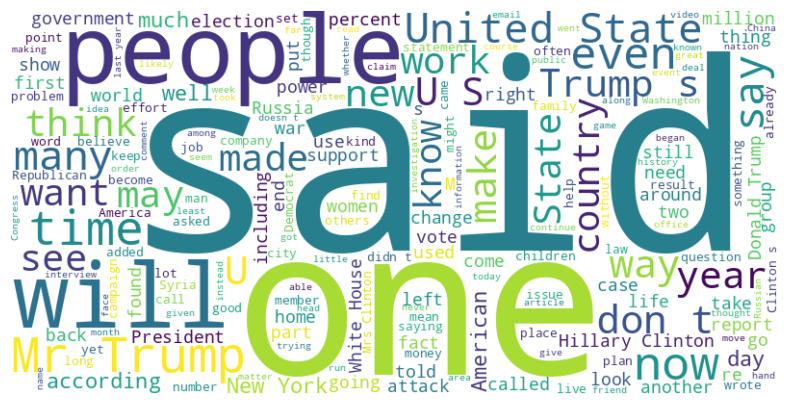

In [ ]:
# Replace with 'fake-news'
competition_name = 'fake-news'

# Download the dataset
api = KaggleApi()
api.authenticate()
api.competition_download_files(competition_name)

# Specify the path to your Kaggle API key file
kaggle_key_path = "/root/.kaggle/kaggle.json"

# Run the chmod command to set the file permissions
os.system(f"chmod 600 {kaggle_key_path}")

# Load the dataset into a DataFrame & Unzip the downloaded files (if required)
import zipfile
with zipfile.ZipFile(f'{competition_name}.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Dataset has a 'text' column containing text-based sentences
df = pd.read_csv('train.csv')

# Concatenate text data
text_data = df['text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

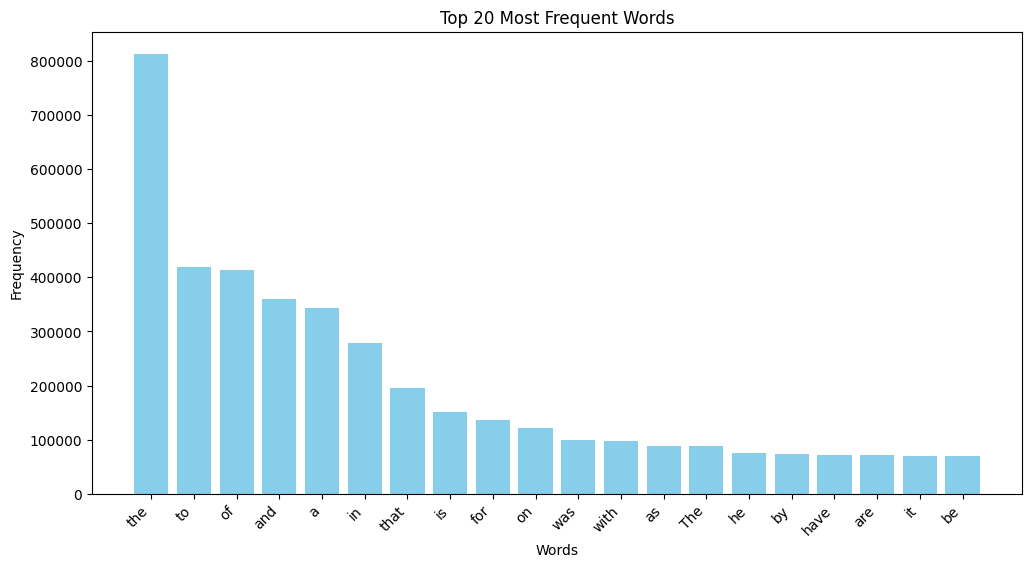

In [ ]:
# Tokenize the text into words
words = text_data.split()

# Calculate word frequencies
word_freq = Counter(words)

# Convert word frequencies to a DataFrame for easier plotting
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.show()

# **FEATURE #3: IDENTIFYING TOP FRAUDSTERS/SOURCES OF FAKE NEWS**


Options:
1. Add fake news source
2. Process and print top fraudsters
3. Check if added names are in train.csv and test.csv
4. Exit
Enter your choice (1, 2, 3, or 4): 1
Enter the source of fake news: Darrell Lucus
Source 'Darrell Lucus' added to the list.

Options:
1. Add fake news source
2. Process and print top fraudsters
3. Check if added names are in train.csv and test.csv
4. Exit
Enter your choice (1, 2, 3, or 4): 1
Enter the source of fake news: Darrell Lucus
Source 'Darrell Lucus' added to the list.

Options:
1. Add fake news source
2. Process and print top fraudsters
3. Check if added names are in train.csv and test.csv
4. Exit
Enter your choice (1, 2, 3, or 4): 1
Enter the source of fake news: Blackmint
Source 'Blackmint' added to the list.

Options:
1. Add fake news source
2. Process and print top fraudsters
3. Check if added names are in train.csv and test.csv
4. Exit
Enter your choice (1, 2, 3, or 4): 1
Enter the source of fake news: Lambda
Source 'Lambda' added to the list

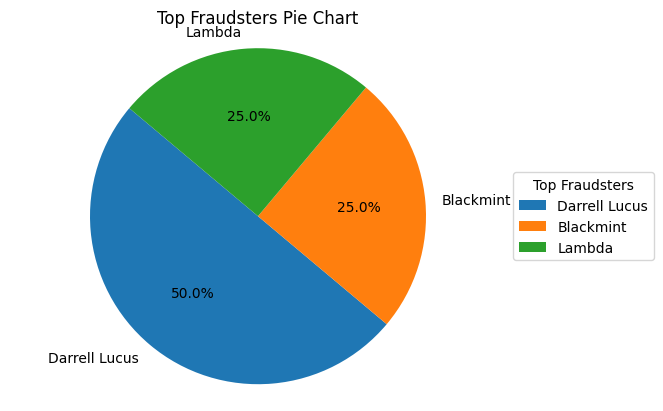


Options:
1. Add fake news source
2. Process and print top fraudsters
3. Check if added names are in train.csv and test.csv
4. Exit
Enter your choice (1, 2, 3, or 4): 3

'Darrell Lucus' is present in the 'author' column of train.csv.

'Darrell Lucus' is present in the 'author' column of train.csv.

'Blackmint' is not found in the 'author' column of either train.csv or test.csv.

'Lambda' is not found in the 'author' column of either train.csv or test.csv.

Options:
1. Add fake news source
2. Process and print top fraudsters
3. Check if added names are in train.csv and test.csv
4. Exit
Enter your choice (1, 2, 3, or 4): 4
Exiting the program.


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Initialize an empty list to store fake news sources
fake_news_sources = []
blacklist = []

# Function to add a fake news source to the list
def add_fake_news_source():
    source = input("Enter the source of fake news: ")
    fake_news_sources.append(source)
    print(f"Source '{source}' added to the list.")

# Function to count repeated entries, add to blacklist, and print top fraudsters
def process_fake_news_sources():
    counter = Counter(fake_news_sources)

    # Count the repeated entries
    repeated_entries = [entry for entry, count in counter.items() if count > 1]

    # Add repeated entries to blacklist
    blacklist.extend(repeated_entries)

    # Get the top fraudsters
    top_fraudsters = dict(counter.most_common())

    # Plot a pie chart
    labels = list(top_fraudsters.keys())
    sizes = list(top_fraudsters.values())

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # Show legend
    plt.legend(labels, title="Top Fraudsters", loc="center left", bbox_to_anchor=(1, 0.5))

    plt.title('Top Fraudsters Pie Chart')
    plt.show()

# Function to check if a name is in the 'author' column of 'train.csv' and 'test.csv'
def check_author_in_datasets(name):
    # Load the train.csv file
    train_data = pd.read_csv('train.csv')

    # Load the test.csv file
    test_data = pd.read_csv('test.csv')

    # Check if the name is in the 'author' column of train.csv and test.csv
    found_in_train = name in train_data['author'].values
    found_in_test = name in test_data['author'].values

    if found_in_train:
        print(f"\n'{name}' is present in the 'author' column of train.csv.")
    if found_in_test:
        print(f"\n'{name}' is present in the 'author' column of test.csv.")

    if not found_in_train and not found_in_test:
        print(f"\n'{name}' is not found in the 'author' column of either train.csv or test.csv.")

# Main loop to keep taking input until the user decides to exit
while True:
    print("\nOptions:")
    print("1. Add fake news source")
    print("2. Process and print top fraudsters")
    print("3. Check if added names are in train.csv and test.csv")
    print("4. Exit")

    choice = input("Enter your choice (1, 2, 3, or 4): ")

    if choice == '1':
        add_fake_news_source()
    elif choice == '2':
        process_fake_news_sources()
    elif choice == '3':
        # Check if any name from the added list is in 'train.csv' and 'test.csv'
        for name_to_check in fake_news_sources:
            check_author_in_datasets(name_to_check)
    elif choice == '4':
        print("Exiting the program.")
        break
    else:
        print("Invalid choice. Please enter 1, 2, 3, or 4.")